<big><big><big><b>Spoiling movies with text analysis API</b></big></big></big>

In this work, we get scripts of movies, assign each sentence to a character, and give each of those sentences to the text analitics API. The most interesting feature of this API is to give an indicator of sentiment of a sentence, which is an indicator from 0 to 1, reflecting how happy the character is.

By doing so, we can get insights about the global situation of each character, and can follow the evolution of some characters through a movie.

<b> warning : </b> there will be spoilers.

So, let's spoil.



First thing needed, an API key for a cognitive service 

In [1]:
API_KEY="0ce77ac4203a40569f40a3a37525ece4"

In [2]:
import pandas as pd
import http.client, urllib.request, urllib.parse, urllib.error, base64
import codecs
import urllib.request
import io
import ast
import numpy as np
import re
import matplotlib.pyplot as plt

Let's then get the script from the internet and clean it a tiny bit

In [3]:
url="http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html"
u = urllib.request.urlopen(url, data = None)
f = io.TextIOWrapper(u,encoding='utf-8')
text = f.read()


Here we go.

In a first time, let's just take the five main characters of the movie : LEIA, LUKE, THREEPIO, VADER, and HAN

In [5]:
script=text.split("scrtext")[1]
script=script.replace("\n","").split("<b>")

characters=["THREEPIO","LUKE","VADER","HAN","LEIA","BEN"]

def sort_by_characters(characters,script):
    interventions={character:[] for character in characters}
    for k in script:
        for character in characters:
            if character in k:
                intervention=k.split("</b>")[1]
                for k in range(30):
                    intervention=intervention.replace("  "," ")
                for phrase in intervention.split("."):
                    if phrase!="":
                        interventions[character].append(phrase)
                break
    return interventions

interventions=sort_by_characters(characters,script)

In [6]:
for character in characters:
    print(character," has ",len(interventions[character])," sentences")

THREEPIO  has  275  sentences
LUKE  has  547  sentences
VADER  has  114  sentences
HAN  has  333  sentences
LEIA  has  125  sentences
BEN  has  209  sentences


So as you can see, there are a few minorities which are not given the same amount of attention (aka the women and the guy in black)

Let's start analysing those interventions with the sentiment analysis. It's quite demanding : at least 20 lines to do it!


In [7]:
#let's do the same for Luke, leia etc
def get_data(PERSO,param='sentiment'):
    body={
      "documents": [
        {
          "id": str(k),
          "text": PERSO[k]
        } for k in range(len(PERSO)) if (len(PERSO[k].split(" "))>0 and (not PERSO[k].isspace()))]

    }
    #print(body)
    API_KEY="0ce77ac4203a40569f40a3a37525ece4"
    conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
    conn.request("POST","/text/analytics/v2.0/sentiment?%s", str(body),{'Ocp-Apim-Subscription-Key': API_KEY})
    response = conn.getresponse()
    data=response.read()
    #except:
        #print("[Errno {0}] {1}".format(e.errno, e.strerror))
    return data
    



In [12]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import codecs
import urllib.request

body={
  "documents": [
    {
      "id": "id",
      "text": "On est jeudi"
    } ]
}
API_KEY="0ce77ac4203a40569f40a3a37525ece4"
conn = http.client.HTTPSConnection('westus.api.cognitive.microsoft.com')
conn.request("POST","/text/analytics/v2.0/sentiment?%s", str(body),{'Ocp-Apim-Subscription-Key': API_KEY})
response = conn.getresponse()
print(response.read())

b'{"documents":[{"score":0.82141000032424927,"id":"id"}],"errors":[]}'


In [9]:
#let's get the list of the scores out of this
def read_data(data):
    scores=[]
    print(data)
    data=(ast.literal_eval(str(data)[2:(len(data)+2)]))
    for sentence in data["documents"]:
        scores.append(sentence["score"])
    return scores

#scores={character:read_data(datas[character]) for character in characters}
#print("mean scores per character")
#for character in characters:
#    print(character,len(scores[character]),np.mean(scores[character]))

<b>The empire strikes back</b>

In [10]:
url="http://www.imsdb.com/scripts/Star-Wars-The-Empire-Strikes-Back.html"
u = urllib.request.urlopen(url, data = None)
f = io.TextIOWrapper(u,encoding='utf-8')
text = f.read()
script=text.split("scrtext")[1]
script=script.replace("\n","").split("<b>")
characters=["THREEPIO","LUKE","VADER","HAN","LEIA"]
interventions=sort_by_characters(characters,script)
datas={character : get_data(interventions[character]) for character in characters}
scores={character : [k for k in read_data(datas[character]) if k!=0.5] for character in characters}
print("mean scores per character")
for character in characters:
    print(character,len(scores[character]),np.mean(scores[character]))

b'{"documents":[{"score":0.10309863090515137,"id":"0"},{"score":0.21724715828895569,"id":"1"},{"score":0.12234741449356079,"id":"2"},{"score":0.0050994753837585449,"id":"3"},{"score":0.7044529914855957,"id":"4"},{"score":0.1656242311000824,"id":"5"},{"score":0.12444689869880676,"id":"6"},{"score":0.22811853885650635,"id":"7"},{"score":0.85762929916381836,"id":"8"},{"score":0.5,"id":"9"},{"score":0.27024108171463013,"id":"10"},{"score":0.13828843832015991,"id":"11"},{"score":0.95307755470275879,"id":"12"},{"score":0.10334724187850952,"id":"13"},{"score":0.12623050808906555,"id":"14"},{"score":0.767292320728302,"id":"15"},{"score":0.85261833667755127,"id":"16"},{"score":0.8261646032333374,"id":"17"},{"score":0.22811853885650635,"id":"18"},{"score":0.75848257541656494,"id":"19"},{"score":0.5,"id":"20"},{"score":0.22811853885650635,"id":"21"},{"score":0.5,"id":"22"},{"score":0.025766432285308838,"id":"23"},{"score":0.5,"id":"24"},{"score":0.071640342473983765,"id":"25"},{"score":0.77419114

<b>The force awakens</b>

In [11]:
url="http://www.imsdb.com/scripts/Star-Wars-The-Force-Awakens.html"
u = urllib.request.urlopen(url, data = None)
f = io.TextIOWrapper(u,encoding='utf-8')
text = f.read()
script=text.split("scrtext")[1]
script=script.replace("\n","").split("<b>")
characters=["FINN","REY","HAN","KYLO REN"]
interventions=sort_by_characters(characters,script)
datas={character : get_data(interventions[character]) for character in characters}
scores={character : [k for k in read_data(datas[character]) if k!=0.5] for character in characters}
print("mean scores per character")
for character in characters:
    print(character,len(scores[character]),np.mean(scores[character]))

b'{"documents":[{"score":0.5,"id":"0"},{"score":0.94551670551300049,"id":"1"},{"score":0.99365770816802979,"id":"2"},{"score":0.81029367446899414,"id":"3"},{"score":0.20514070987701416,"id":"4"},{"score":0.058959215879440308,"id":"5"},{"score":0.5,"id":"6"},{"score":0.8547523021697998,"id":"7"},{"score":0.069155097007751465,"id":"8"},{"score":0.18327754735946655,"id":"9"},{"score":0.88463288545608521,"id":"10"},{"score":0.070572733879089355,"id":"11"},{"score":0.27148479223251343,"id":"12"},{"score":0.77856194972991943,"id":"13"},{"score":0.5,"id":"14"},{"score":0.73800671100616455,"id":"15"},{"score":0.28547608852386475,"id":"16"},{"score":0.5,"id":"17"},{"score":0.27165758609771729,"id":"18"},{"score":0.10672524571418762,"id":"19"},{"score":0.28317898511886597,"id":"20"},{"score":0.25880515575408936,"id":"21"},{"score":0.25880515575408936,"id":"22"},{"score":0.25880515575408936,"id":"23"},{"score":0.76153826713562012,"id":"24"},{"score":0.072009086608886719,"id":"25"},{"score":0.1977

So as you can see, Finn, rey, and especially Kylo Ren are not that happy to be there. I'd argue that the tone of this movie is darker than the original trilogy for the part they are involved in, so I'm not that surprised.

<b> Apocalypse now </b>

In [12]:
url="http://www.imsdb.com/scripts/Apocalypse-Now.html"
u = urllib.request.urlopen(url, data = None)
f = io.TextIOWrapper(u,encoding='utf-8',errors='ignore')
text = f.read()
script=text.split("scrtext")[1]
script=script.replace("\n","").split("<b>")
characters=["WILLARD","KILGORE","GASTON","CHIEF","LANCE","KURTZ"]
interventions=sort_by_characters(characters,script)
datas={character : get_data(interventions[character]) for character in characters}
scores={character : [k for k in read_data(datas[character]) if k!=0.5] for character in characters}
print("mean scores per character")
for character in characters:
    print(character,len(scores[character]),np.mean(scores[character]))

b'{"documents":[{"score":0.2775384783744812,"id":"0"},{"score":0.87327086925506592,"id":"1"},{"score":0.73655617237091064,"id":"2"},{"score":0.86038839817047119,"id":"3"},{"score":0.74009805917739868,"id":"4"},{"score":0.5,"id":"5"},{"score":0.980304479598999,"id":"6"},{"score":0.80130517482757568,"id":"7"},{"score":0.78498631715774536,"id":"8"},{"score":0.00071293115615844727,"id":"9"},{"score":0.69543361663818359,"id":"10"},{"score":0.11654451489448547,"id":"11"},{"score":0.5,"id":"12"},{"score":0.954371452331543,"id":"13"},{"score":0.027367174625396729,"id":"14"},{"score":0.72336065769195557,"id":"15"},{"score":0.5,"id":"16"},{"score":0.93566703796386719,"id":"17"},{"score":0.16464605927467346,"id":"18"},{"score":0.80467021465301514,"id":"19"},{"score":0.5,"id":"20"},{"score":0.23844584822654724,"id":"21"},{"score":0.90226304531097412,"id":"22"},{"score":0.2316337525844574,"id":"23"},{"score":0.25578239560127258,"id":"24"},{"score":0.21083122491836548,"id":"25"},{"score":0.188933730

let's now test the key phrase extraction option, just to test it and check the kind of words coming out of it. Roughly, it seems to be about war. I believe more could be with this, but I lack inspiration here

In [13]:
data2=get_data(interventions["GASTON"],param="KeyPhrases")
print(data2)

b'{"documents":[{"score":0.27831539511680603,"id":"0"},{"score":0.5,"id":"1"},{"score":0.5,"id":"2"},{"score":0.5,"id":"3"},{"score":0.16848009824752808,"id":"4"},{"score":0.5,"id":"5"},{"score":0.5,"id":"6"},{"score":0.5,"id":"7"},{"score":0.84168624877929688,"id":"8"},{"score":0.75020098686218262,"id":"9"},{"score":0.73881608247756958,"id":"10"},{"score":0.5,"id":"11"},{"score":0.2841435968875885,"id":"12"},{"score":0.19109827280044556,"id":"13"},{"score":0.23690751194953918,"id":"14"},{"score":0.5,"id":"15"},{"score":0.5,"id":"16"},{"score":0.5,"id":"17"},{"score":0.5,"id":"18"},{"score":0.5,"id":"19"},{"score":0.21507832407951355,"id":"20"},{"score":0.5,"id":"21"},{"score":0.23554649949073792,"id":"22"},{"score":0.5,"id":"23"},{"score":0.5,"id":"24"},{"score":0.13330727815628052,"id":"25"},{"score":0.870048999786377,"id":"26"},{"score":0.896903395652771,"id":"27"},{"score":0.95446765422821045,"id":"28"},{"score":0.30111849308013916,"id":"29"},{"score":0.75637984275817871,"id":"30"}

Let's now plot the emotions of Willard with the evolution of the movie. We do smooth a little bit the shape of the data so to have a broad impression of the emotion at a given time.
Here we can see a few cycles, corresponding to the different steps of Willard journey to hell. It gets darker with time, untill Willard embraces his madness (and then it seems fine?)

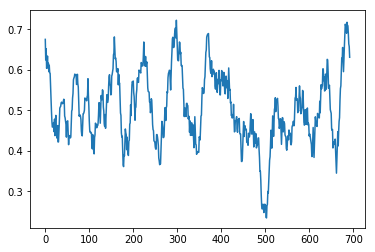

In [14]:
scores=[np.mean([j for j in scores["WILLARD"][max(0,k-10):min(len(scores["WILLARD"])-1,k+10)]]) for k in range(len(scores["WILLARD"]))]
plt.plot(scores)
plt.show()

<b> V for Vendetta </b>

In [15]:
url="http://www.imsdb.com/scripts/V-for-Vendetta.html"
u = urllib.request.urlopen(url, data = None)
f = io.TextIOWrapper(u,encoding='utf-8',errors='ignore')
text = f.read()
script=text.split("scrtext")[1]
script=script.replace("\n","").split("<b>")

characters=["EVEY","V","PROTHERO","LEADER"]
interventions=sort_by_characters(characters,script)
datas={character : get_data(interventions[character]) for character in characters}
scores={character : [k for k in read_data(datas[character]) if k!=0.5] for character in characters}
print("mean scores per character")
for character in characters:
    print(character,len(scores[character]),np.mean(scores[character]))

b'{"documents":[{"score":0.5,"id":"0"},{"score":0.1041034460067749,"id":"1"},{"score":0.5,"id":"3"},{"score":0.5,"id":"4"},{"score":0.5,"id":"5"},{"score":0.877331018447876,"id":"6"},{"score":0.78217899799346924,"id":"7"},{"score":0.5,"id":"8"},{"score":0.70407629013061523,"id":"9"},{"score":0.72629702091217041,"id":"10"},{"score":0.5,"id":"11"},{"score":0.5,"id":"12"},{"score":0.090137481689453125,"id":"13"},{"score":0.19344237446784973,"id":"14"},{"score":0.13922131061553955,"id":"15"},{"score":0.10684210062026978,"id":"16"},{"score":0.80401289463043213,"id":"17"},{"score":0.21098226308822632,"id":"18"},{"score":0.0919855535030365,"id":"19"},{"score":0.83046352863311768,"id":"20"},{"score":0.5,"id":"21"},{"score":0.74162542819976807,"id":"22"},{"score":0.78137195110321045,"id":"23"},{"score":0.85300856828689575,"id":"24"},{"score":0.80887281894683838,"id":"25"},{"score":0.5,"id":"26"},{"score":0.7526739239692688,"id":"27"},{"score":0.7526739239692688,"id":"28"},{"score":0.75267392396

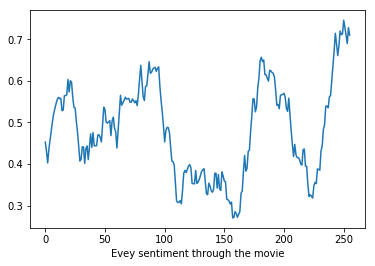

In [16]:
scores2=[np.mean([j for j in scores["EVEY"][max(0,k-10):min(len(scores["EVEY"])-1,k+10)]]) for k in range(len(scores["EVEY"]))]
plt.plot(scores2)
plt.xlabel('Evey sentiment through the movie')
plt.show()

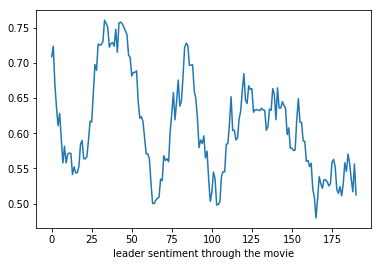

In [17]:
scores2=[np.mean([j for j in scores["LEADER"][max(0,k-10):min(len(scores["LEADER"])-1,k+10)]]) for k in range(len(scores["LEADER"]))]
plt.plot(scores2)
plt.xlabel('leader sentiment through the movie')
plt.show()

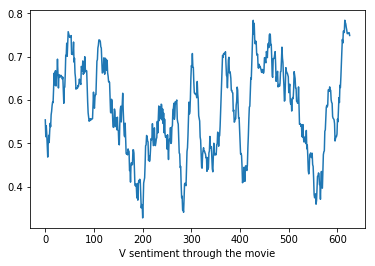

In [18]:
scores2=[np.mean([j for j in scores["V"][max(0,k-10):min(len(scores["V"])-1,k+10)]]) for k in range(len(scores["V"]))]
plt.plot(scores2)
plt.xlabel('V sentiment through the movie')
plt.show()

Above, the evolution of the emotions of Evey and the leader. We can pinpoint that both are symetrical, reflecting opposing evolutions during the movie. The time Evey spends in prison is specially obvious.

<b> Conclusion </b>

As we've seen, getting a single emotion, from 1 to 0, out of a sentence, is not obvious, and the cognitive service will often fail at it. 
However, when we look at the broader picture, we can see that the sentiment indicator given by the API is able to reflect the plot of a movie, and to give insight about what a character is going through.

We can expand this work by saying that the service will be specially relevant to estimate broad satisfaction, but might fail at detecting one specific emotion